Write your post here.

In [1]:
from gplearn.genetic import SymbolicRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.random import check_random_state
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as pl
from matplotlib import rcParams
from IPython.display import Image
from scipy.io import loadmat
import pydotplus
% matplotlib inline

In [2]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['font.size'] = 16

In [3]:
fpath ='/accounts/ekarakoy/DATA/OWT/nomad_rrs4clustering.mat'

In [4]:
matlabData = loadmat(fpath)

In [5]:
wavelength = matlabData['wl'][0]
rrsBelow = matlabData['rrs_below']
chl = matlabData['chl_nomad'] # I might use this as an additional feature in clustering

In [6]:
labels = list(wavelength) + ['chl']
df = pd.DataFrame(data=np.hstack((rrsBelow, chl)), columns=labels)

In [7]:
df.head()

,411,443,469,489,510,520,547,550,555,560,565,670,chl
0,0.002307,0.003225,0.004674,0.006265,0.007661,0.008944,0.012935,0.013410,0.014040,0.014715,0.015325,0.006588,38.19
1,0.002035,0.002650,0.003273,0.004149,0.004767,0.005416,0.007338,0.007570,0.007878,0.008208,0.008549,0.003241,35.01
2,0.001862,0.002271,0.002654,0.003523,0.004367,0.005147,0.007423,0.007691,0.008053,0.008434,0.008822,0.003084,26.91
3,0.002817,0.003330,0.004096,0.005482,0.006963,0.008243,0.012075,0.012525,0.013127,0.013770,0.014361,0.006154,47.96
4,0.001735,0.001959,0.002129,0.002882,0.003638,0.004115,0.005079,0.005191,0.005337,0.005507,0.005716,0.003423,23.55


Make a new dataframe with just SeaWiFS-wavelength Rrs and chl.

In [8]:
swfWvl = [411, 443, 489, 510, 555, 670]

In [9]:
dfSwf = df.loc[:, swfWvl + ['chl']]

In [10]:
dfSwf.head()

,411,443,489,510,555,670,chl
0,0.002307,0.003225,0.006265,0.007661,0.014040,0.006588,38.19
1,0.002035,0.002650,0.004149,0.004767,0.007878,0.003241,35.01
2,0.001862,0.002271,0.003523,0.004367,0.008053,0.003084,26.91
3,0.002817,0.003330,0.005482,0.006963,0.013127,0.006154,47.96
4,0.001735,0.001959,0.002882,0.003638,0.005337,0.003423,23.55


In [11]:
dfSwf.describe()

,411,443,489,510,555,670,chl
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,0.009913,0.009351,0.009086,0.007638,0.006105,0.001289,1.544312
std,0.006548,0.005329,0.004598,0.004656,0.006091,0.002629,4.002408
min,0.000098,0.000365,0.000546,0.000502,0.000398,0.000023,0.000000
25%,0.005000,0.005335,0.006135,0.005511,0.003029,0.000196,0.054000
50%,0.007967,0.008120,0.008528,0.006562,0.003970,0.000385,0.301200
75%,0.013895,0.012699,0.011118,0.007965,0.006047,0.001101,1.218750
max,0.039485,0.031489,0.046573,0.050136,0.060087,0.031832,72.120000


In [12]:
dfSwf['maxBlue'] = dfSwf.loc[:,[443, 490, 510]].max(axis=1)

In [12]:
dfSwf.head()

,411,443,489,510,555,670,chl
0,0.002307,0.003225,0.006265,0.007661,0.014040,0.006588,38.19
1,0.002035,0.002650,0.004149,0.004767,0.007878,0.003241,35.01
2,0.001862,0.002271,0.003523,0.004367,0.008053,0.003084,26.91
3,0.002817,0.003330,0.005482,0.006963,0.013127,0.006154,47.96
4,0.001735,0.001959,0.002882,0.003638,0.005337,0.003423,23.55


In [13]:
dfSwf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 7 columns):
411    2404 non-null float64
443    2404 non-null float64
489    2404 non-null float64
510    2404 non-null float64
555    2404 non-null float64
670    2404 non-null float64
chl    2404 non-null float64
dtypes: float64(7)
memory usage: 131.5 KB


no cleanup seemingly necessary but standardization needed

In [14]:
X = np.log10(dfSwf.loc[:,swfWvl ])
y = np.log10(dfSwf.loc[:,'chl']+1e-7)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
X_train.head()

,411,443,489,510,555,670
1049,-1.880740,-1.960728,-2.024052,-2.215354,-2.542065,-3.716580
2329,-2.182330,-2.171378,-2.109713,-2.115410,-2.143926,-2.969521
828,-1.824443,-1.890843,-2.003843,-2.186378,-2.505928,-3.482677
1118,-2.164747,-2.007362,-1.751541,-1.686165,-1.557953,-2.050500
2358,-1.803496,-1.650073,-1.454912,-1.420693,-1.347400,-1.925490


In [23]:
y_train

1.8580557186525475

In [21]:
def CI(df):
    # assumes df has rrs data at specific wavelengths
    blue, green, red=443, 555, 670
    ci = df[green] - (df[blue] + (green - blue) / (red - blue) * (df[red] - df[blue]))
    return ci

In [56]:
def OC4(rrsMaxBlue, rrsGreen, log=True):
    # maxblue is last column of rrsData
    a=[0.3272, -2.9940, 2.7218, -1.2259, -0.5683]
    if log:
        poly = np.sum([a[i]*np.power((rrsMaxBlue - rrsGreen),i)
                       for i in range(1,5) ], axis=0)
    else:
        poly = np.sum([a[i]*np.power(np.log10(rrsMaxBlue/rrsGreen),i )
                       for i in range(1,5) ], axis=0)
    poly+=a[0]
    chl = np.power(10,poly)
    return chl

In [39]:
dfSwf.head()

,411,443,489,510,555,670,chl,maxBlue
0,0.002307,0.003225,0.006265,0.007661,0.014040,0.006588,38.19,0.007661
1,0.002035,0.002650,0.004149,0.004767,0.007878,0.003241,35.01,0.004767
2,0.001862,0.002271,0.003523,0.004367,0.008053,0.003084,26.91,0.004367
3,0.002817,0.003330,0.005482,0.006963,0.013127,0.006154,47.96,0.006963
4,0.001735,0.001959,0.002882,0.003638,0.005337,0.003423,23.55,0.003638


In [66]:
#X_train comes from X, which was log transformed, so...
green = 555
maxBlueTrain = X_train[[443, 489, 510]].max(axis=1)
chl_train = OC4(maxBlueTrain.values, X_train[green].values, log=True)

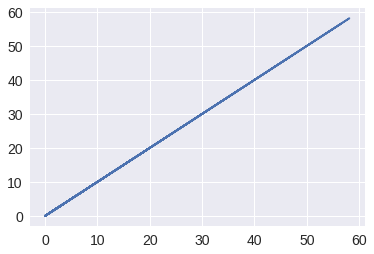

In [67]:
# making sure the log option in oc4 works
logchlMdl = OC4(np.log10(dfSwf.maxBlue.values), np.log10(dfSwf[green].values),
                  log=True)
chlMdl = OC4(dfSwf.maxBlue.values, dfSwf[green].values,log=False)
pl.plot(logchlMdl, chlMdl);

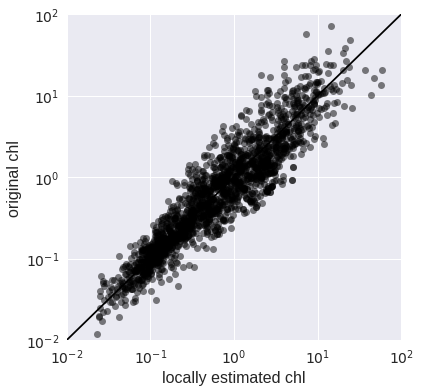

In [43]:
pl.figure(figsize=(6,6))
pl.plot(chl_train,dfSwf.chl.values,'ko',alpha=0.5)
pl.yscale('log')
pl.ylim(1e-2,1e2)
pl.xlim(1e-2,1e2)
pl.xscale('log')
pl.plot([1e-2,1e2],[1e-2,1e2],'k')
pl.xlabel('locally estimated chl', fontsize=16)
pl.ylabel('original chl', fontsize=16);

In [24]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,transformer=True,
                           trigonometric=False,
                           p_crossover=0.6, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.2,
                           max_samples=0.9, verbose=1, comparison=True, 
                           parsimony_coefficient=0.01)
est_gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.98    5.37421008801       10    1.60141143101    2.15308168814     42.41s
   1     6.27      2.547998628       11    1.58730009636    2.28008369995     42.10s
   2     5.25    2.46617351102        9     1.5959552238    1.92033447122     38.70s
   3      5.6    2.42668226587        6    1.57374741264    2.00280432029     35.66s
   4     3.57    2.17127505227        6    1.57225105753    2.00635764976     32.58s
   5     3.41    2.14353300735        5    1.55440309604    2.03866115076     30.00s
   6     3.71    2.14399146919        5    1.51902502782    2.30364477349     27.54s
   7     4.53    2.21288848599        5    1.53285135961    2.23262677854     25.31s
   8     5.04    2.29974285014        5    1.52598205356    2.24103154184  

SymbolicRegressor(comparison=True, const_range=(-1.0, 1.0), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.6,
         p_hoist_mutation=0.05, p_point_mutation=0.2, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=None, stopping_criteria=0.0,
         tournament_size=20, transformer=True, trigonometric=False,
         verbose=1)

In [25]:
print(est_gp._program)

div(sub(X4, X1), 0.679)


In [44]:
y_from_train = est_gp.predict(X_train)

### I SHOULD DROP THE ZEROS THEY'RE FUNKY & I BET THEY THROW THE GEN PROG. OFF!

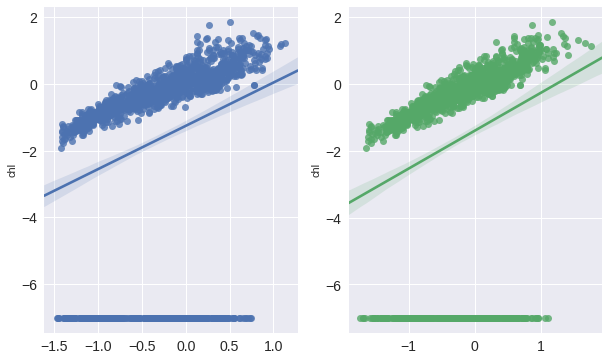

In [69]:
f,axs = pl.subplots(ncols=2, figsize=(10,6))
sb.regplot(y_from_train, y_train, ax=axs[0],)
sb.regplot(np.log10(chl_train), y_train, ax=axs[1])

In [47]:
y_from_train.shape

(1610,)

In [48]:
y_train.shape

(1610,)

In [49]:
chl_train.shape

(2404,)

In [32]:
est_gp.score(X_test,y_test)

-0.18956266196600291

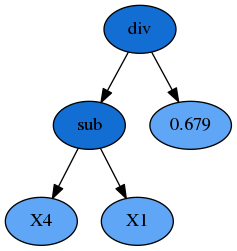

In [46]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())